# Section 4.2 - Venus SmallSat Aerocapture - Tradespace Exploration

We use aerocapture feasibility charts to explore the design trade space for aerocapture at Venus using drag modulation aerocapture.

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [2]:
# Create a planet object
planet=Planet("VENUS")
planet.h_skip = 150000.0

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../../../atmdata/Venus/venus-gram-avg.dat', 0 , 1 ,2, 3)

vinf_kms_array  = np.linspace( 0.0,   10.0,   11)
betaRatio_array = np.linspace( 1.0,   21.0 ,  11)

In [3]:
beta1 = 20.0
runID = 'venus-smallsat-dm'

In [4]:
v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 + 2*np.ones(len(vinf_kms_array))*planet.GM/(planet.RP+150.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(betaRatio_array)))
underShootLimit_array = np.zeros((len(v0_kms_array),len(betaRatio_array)))
exitflag_os_array     = np.zeros((len(v0_kms_array),len(betaRatio_array)))
exitflag_us_array     = np.zeros((len(v0_kms_array),len(betaRatio_array)))
TCW_array             = np.zeros((len(v0_kms_array),len(betaRatio_array)))

In [5]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(betaRatio_array)):
        vehicle=Vehicle('DMVehicle', 100.0, beta1, 0.0, 1.767, 0.0, 0.35, planet)
        vehicle.setInitialState(150.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.setDragModulationVehicleParams(beta1,betaRatio_array[j])

        underShootLimit_array[i,j], exitflag_us_array[i,j] = vehicle.findUnderShootLimitD(2400.0, 2.0, -80.0,-4.0,1E-10, 400.0)
        overShootLimit_array[i,j] , exitflag_os_array[i,j] = vehicle.findOverShootLimitD (2400.0, 2.0, -80.0,-4.0,1E-10, 400.0)

        TCW_array[i,j]    = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print('VINF: '+str(vinf_kms_array[i])+' km/s, BETA RATIO: '+str(betaRatio_array[j])+' TCW: '+str(TCW_array[i,j])+' deg.')

np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'betaRatio_array.txt',betaRatio_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'underShootLimit_array.txt',underShootLimit_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'TCW_array.txt',TCW_array)

VINF: 0.0 km/s, BETA RATIO: 1.0 TCW: 0.0 deg.
VINF: 0.0 km/s, BETA RATIO: 3.0 TCW: 0.22008299338631332 deg.
VINF: 0.0 km/s, BETA RATIO: 5.0 TCW: 0.3220487156722811 deg.
VINF: 0.0 km/s, BETA RATIO: 7.0 TCW: 0.38787807517292094 deg.
VINF: 0.0 km/s, BETA RATIO: 9.0 TCW: 0.4360231767168443 deg.
VINF: 0.0 km/s, BETA RATIO: 11.0 TCW: 0.4738638612579962 deg.
VINF: 0.0 km/s, BETA RATIO: 13.0 TCW: 0.5050491497822804 deg.
VINF: 0.0 km/s, BETA RATIO: 15.0 TCW: 0.5315089544747025 deg.
VINF: 0.0 km/s, BETA RATIO: 17.0 TCW: 0.5544410763759515 deg.
VINF: 0.0 km/s, BETA RATIO: 19.0 TCW: 0.5747357478830963 deg.
VINF: 0.0 km/s, BETA RATIO: 21.0 TCW: 0.5929213868803345 deg.
VINF: 1.0 km/s, BETA RATIO: 1.0 TCW: 0.0 deg.
VINF: 1.0 km/s, BETA RATIO: 3.0 TCW: 0.22123349050889374 deg.
VINF: 1.0 km/s, BETA RATIO: 5.0 TCW: 0.3235909743088996 deg.
VINF: 1.0 km/s, BETA RATIO: 7.0 TCW: 0.3896626835994539 deg.
VINF: 1.0 km/s, BETA RATIO: 9.0 TCW: 0.4379480112984311 deg.
VINF: 1.0 km/s, BETA RATIO: 11.0 TCW: 0.47592

In [36]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(betaRatio_array)))
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(betaRatio_array)))
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(betaRatio_array)))
heatload_max_array        = np.zeros((len(v0_kms_array),len(betaRatio_array)))


for i in range(0,len(v0_kms_array)):
    for j in range(0,len(betaRatio_array)):
        vehicle=Vehicle('DMVehicle', 50.0, beta1, 0.0, 1.767, 0.0, 0.35, planet)
        vehicle.setInitialState(150.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-6)

        vehicle.propogateEntry (2400.0, 2.0, 0.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5)
        heatload_os      = vehicle.heatload


        vehicle=Vehicle('DMVehicle', 50.0, beta1, 0.0, 1.767, 0.0, 0.35, planet)
        vehicle.setInitialState(150.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams( 1E-6)

        vehicle.propogateEntry (2400.0, 2.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5)
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_os))
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = min(max(q_stag_total_os),max(q_stag_total_us))
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_os))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", BR: "+str(betaRatio_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))

np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, BR: 1.0 G_MAX: 4.079933711421796 QDOT_MAX: 113.05000994278133 J_MAX: 10817.79164972663 STAG. PRES: 0.007903249111091654
V_infty: 0.0 km/s, BR: 3.0 G_MAX: 4.079933711421796 QDOT_MAX: 144.09189070737747 J_MAX: 10817.79164972663 STAG. PRES: 0.007903249111091654
V_infty: 0.0 km/s, BR: 5.0 G_MAX: 4.079933711421796 QDOT_MAX: 155.67921157028482 J_MAX: 10817.79164972663 STAG. PRES: 0.007903249111091654
V_infty: 0.0 km/s, BR: 7.0 G_MAX: 4.079933711421796 QDOT_MAX: 162.37217328901724 J_MAX: 10817.79164972663 STAG. PRES: 0.007903249111091654
V_infty: 0.0 km/s, BR: 9.0 G_MAX: 4.079933711421796 QDOT_MAX: 167.02177853435035 J_MAX: 10817.79164972663 STAG. PRES: 0.007903249111091654
V_infty: 0.0 km/s, BR: 11.0 G_MAX: 4.079933711421796 QDOT_MAX: 170.24635176423186 J_MAX: 10817.79164972663 STAG. PRES: 0.007903249111091654
V_infty: 0.0 km/s, BR: 13.0 G_MAX: 4.079933711421796 QDOT_MAX: 173.2497530224659 J_MAX: 10817.79164972663 STAG. PRES: 0.007903249111091654
V_infty: 0.0 km/s, BR: 15.

V_infty: 5.0 km/s, BR: 9.0 G_MAX: 6.744827193800617 QDOT_MAX: 247.73933480785607 J_MAX: 13420.023386313193 STAG. PRES: 0.013064013033291657
V_infty: 5.0 km/s, BR: 11.0 G_MAX: 6.744827193800617 QDOT_MAX: 252.36648638461264 J_MAX: 13420.023386313193 STAG. PRES: 0.013064013033291657
V_infty: 5.0 km/s, BR: 13.0 G_MAX: 6.744827193800617 QDOT_MAX: 255.7528597021401 J_MAX: 13420.023386313193 STAG. PRES: 0.013064013033291657
V_infty: 5.0 km/s, BR: 15.0 G_MAX: 6.744827193800617 QDOT_MAX: 259.1477843365355 J_MAX: 13420.023386313193 STAG. PRES: 0.013064013033291657
V_infty: 5.0 km/s, BR: 17.0 G_MAX: 6.744827193800617 QDOT_MAX: 261.85755271638715 J_MAX: 13420.023386313193 STAG. PRES: 0.013064013033291657
V_infty: 5.0 km/s, BR: 19.0 G_MAX: 6.744827193800617 QDOT_MAX: 264.1390694442427 J_MAX: 13420.023386313193 STAG. PRES: 0.013064013033291657
V_infty: 5.0 km/s, BR: 21.0 G_MAX: 6.744827193800617 QDOT_MAX: 265.9345806708452 J_MAX: 13420.023386313193 STAG. PRES: 0.013064013033291657
V_infty: 6.0 km/s,

V_infty: 10.0 km/s, BR: 17.0 G_MAX: 15.795629284230742 QDOT_MAX: 734.3618177914249 J_MAX: 22406.99315223976 STAG. PRES: 0.030589213513601086
V_infty: 10.0 km/s, BR: 19.0 G_MAX: 15.795629284230742 QDOT_MAX: 738.4864017047046 J_MAX: 22406.99315223976 STAG. PRES: 0.030589213513601086
V_infty: 10.0 km/s, BR: 21.0 G_MAX: 15.795629284230742 QDOT_MAX: 744.5620616687944 J_MAX: 22406.99315223976 STAG. PRES: 0.030589213513601086


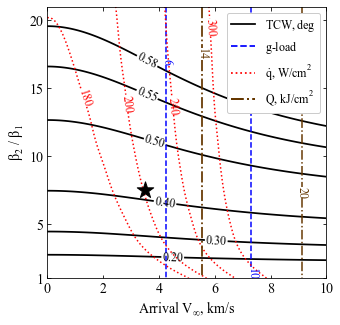

In [5]:
x = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'betaRatio_array.txt')

Z1 = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../../../data/acta-astronautica/smallsat-mission-concepts/venus/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
s1 = interpolate.interp2d(x, y, np.transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   10,  110)
y_new =  np.linspace( 0.0,   21 , 110)

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        s1_new[i,j] = s1(x_new[i],y_new[j])


Z1 = z1_new
G1 = g1_new
Q1 = q1_new
S1 = s1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)

Zlevels = np.array([0.20, 0.30, 0.40, 0.50, 0.55, 0.58])

Glevels = np.array([6, 10])
Qlevels = np.array([180, 200, 240, 300])
Hlevels = np.array([14, 20])
#Slevels = np.array([0.8])


fig = plt.figure()
fig.set_size_inches([5,5])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.xlim([0.0,10.0])
plt.ylim([1.0,21.0])


ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=12, colors='black',fmt='%.2f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.75)
ZCS1.collections[1].set_linewidths(1.75)
ZCS1.collections[2].set_linewidths(1.75)
ZCS1.collections[3].set_linewidths(1.75)
ZCS1.collections[4].set_linewidths(1.75)
ZCS1.collections[5].set_linewidths(1.75)

ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

Glabels=plt.clabel(GCS1, inline=1, fontsize=12, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[0].set_linewidths(1.5)

GCS1.collections[0].set_label(r'$g$'+r'-load')





QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

Qlabels = plt.clabel(QCS1, inline=1, fontsize=12, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[2].set_linewidths(1.5)
QCS1.collections[3].set_linewidths(1.5)
QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot')

Hlabels=plt.clabel(HCS1, inline=1, fontsize=12, colors='xkcd:brown',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.75)
#HCS1.collections[1].set_linewidths(1.75)


HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')


#GCS1.collections[0].set_label(r'$Peak$'+r' '+r'$g-load$')
#plt.grid(True,linestyle='dotted', linewidth=0.3)
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.ylabel(r'$\beta_2$'+' / '+r'$ \beta_1 $' ,fontsize=14)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=14)
plt.yticks(np.array([1, 5, 10, 15, 20]),fontsize=14)
plt.xticks(fontsize=14)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
#plt.legend(loc='upper left', fontsize=16)
from matplotlib.lines import Line2D
colors = ['black', 'red', 'green']
lines = [Line2D([0], [0], color='black', linewidth=1.75, linestyle='solid'),
         Line2D([0], [0], color='blue',  linewidth=1.75, linestyle='dashed'),
         Line2D([0], [0], color='red',  linewidth=1.75, linestyle='dotted'),
         Line2D([0], [0], color='xkcd:brown',  linewidth=2.00, linestyle='dashdot')]
labels = [r'$TCW, deg$', r'$g$'+r'-load', r'$\dot{q}$'+', '+r'$W/cm^2$', r'$Q$'+', '+r'$kJ/cm^2$']
plt.legend(lines, labels, loc='upper right',fontsize=12, framealpha=1)

for l in Hlabels:
    l.set_rotation(-90)
for l in Glabels:
    l.set_rotation(-90)

#plt.axhline(y=7.5, color='k', linestyle='dotted')
#plt.text(4, 8.0, r'$\beta_2$'+' / '+r'$ \beta_1 $', fontsize=12)
plt.scatter(3.51, 7.5, marker="*", s=300, color='xkcd:black', zorder=100)

plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-ac-tradespace.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-ac-tradespace.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/smallsat-mission-concepts/venus/venus-smallsat-ac-tradespace.eps', dpi=300,bbox_inches='tight')


plt.show()